# 데이터셋

https://www.kaggle.com/competitions/digit-recognizer/data


In [1]:
!unzip -qq /content/drive/MyDrive/dataset/digitRecognizerDataset.zip

In [24]:
import pandas as pd

# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## 데이터셋만들기

In [3]:
train # 0번째 컬럼이 y데이터, 1번째 컬럼부터 785번째 컬럼까지 784(28*28)의 픽셀값이 들어있다.

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
y_train = train["label"] # 라벨 컬럼이 y data이므로 y_train이라는 변수에 넣어준다.
x_train = train.drop(labels = ["label"],axis = 1) # label데이터를 뺀 column들은 row 하나하나가 한장의 그림이기 때문에 x data가 된다.

In [5]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
x_train.info() # 결측치가 있나 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [7]:
test.info() # 결측치가 있나 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=42)

# 머신러닝

In [9]:
from sklearn.naive_bayes import GaussianNB               ## 나이브 베이즈
from sklearn import svm                                  ## 서포트 벡터 머신
from sklearn import tree                                 ## 의사결정나무
from sklearn.ensemble import RandomForestClassifier      ## 랜덤포레스트

In [10]:
# 나이브 베이즈모델의 정확도
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_val, y_val)

0.5671428571428572

In [11]:
# 의사결정트리모델의 정확도
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
clf.score(x_val, y_val)

0.8545238095238096

In [12]:
# 서포트벡터머신모델의 정확도
clf = svm.SVC()
clf.fit(x_train, y_train)
clf.score(x_val, y_val)

0.9759523809523809

In [13]:
#랜덤포레스트모델의 정확도
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_val, y_val)

0.9633333333333334

# CNN

In [14]:
import numpy as np

In [27]:
# 정규화
x_train = x_train / 255.0
x_val = x_val/ 255.0
test = test / 255.0

In [28]:
# cnn을 사용할 것이기 때문에 mnist 데이터(28*28*1) 784픽셀을 3차원으로 바꾸어준다.
x_train = x_train.values.reshape(-1,28,28,1)
x_val = x_val.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [29]:
from keras.utils.np_utils import to_categorical # 원핫인코딩을 하기 위해서

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

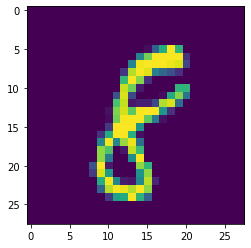

In [18]:
import matplotlib.pyplot as plt

g = plt.imshow(x_train[0][:,:,0])

In [19]:
import keras

In [20]:
model = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', input_shape=(28,28,1), use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])


In [30]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val,y_val))

Epoch 1/100
1182/1182 [==============================] - 8s 7ms/step - loss: 1.8638e-09 - accuracy: 1.0000 - val_loss: 0.0810 - val_accuracy: 0.9924
Epoch 2/100
1182/1182 [==============================] - 7s 6ms/step - loss: 9.4295e-10 - accuracy: 1.0000 - val_loss: 0.0834 - val_accuracy: 0.9929
Epoch 3/100
1182/1182 [==============================] - 7s 6ms/step - loss: 6.4651e-10 - accuracy: 1.0000 - val_loss: 0.0849 - val_accuracy: 0.9926
Epoch 4/100
1182/1182 [==============================] - 9s 8ms/step - loss: 2.9645e-10 - accuracy: 1.0000 - val_loss: 0.0855 - val_accuracy: 0.9926
Epoch 5/100
1182/1182 [==============================] - 7s 6ms/step - loss: 4.3836e-10 - accuracy: 1.0000 - val_loss: 0.0864 - val_accuracy: 0.9926
Epoch 6/100
1182/1182 [==============================] - 7s 6ms/step - loss: 2.9645e-10 - accuracy: 1.0000 - val_loss: 0.0868 - val_accuracy: 0.9924
Epoch 7/100
1182/1182 [==============================] - 7s 6ms/step - loss: 1.9553e-10 - accuracy: 1.0000

In [31]:
pred = model.predict(test)

In [40]:
results = np.argmax(pred, axis=1)
results = pd.Series(results, name="Label")

In [41]:
submission = pd.concat([pd.Series(range(1,28001), name="ImageId"), results], axis=1)
submission.to_csv("submit.csv", index=False)

제출하였더니 99.378%로 꽤 괜찮게 나왔다.

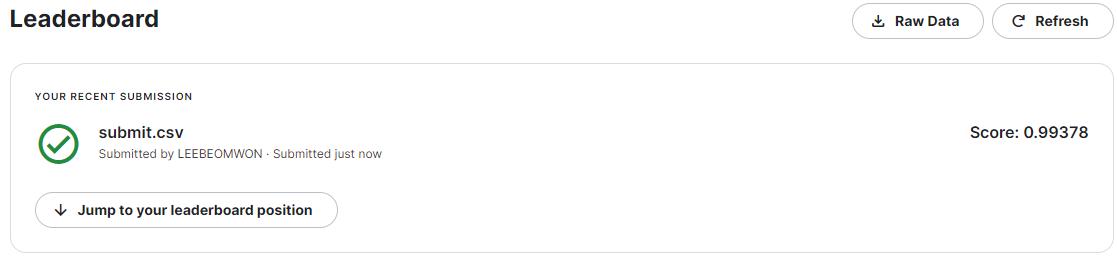

165등을 하였다.
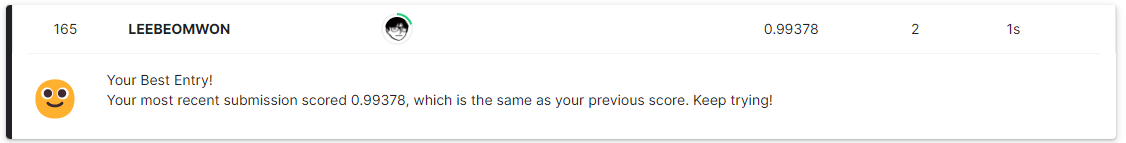